<a href="https://colab.research.google.com/github/sg758253/sg1205/blob/main/ADVDS/project4/Customer_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Satisfaction**: In this assignment, you will be performing experiments on the Kaggle's Customer Satisfaction dataset (Links to an external site.). The training/testing sets include data about customers that are grouped into 4 segments (classes A, B, C, D)  based on a number of categoric and numeric attributes such as gender, age, profession, work experience, etc. 

In [50]:
# import library
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [51]:
# Read csv file
df_train= pd.read_csv('https://raw.githubusercontent.com/sg758253/sg1205/main/ADVDS/project4/Train.csv')
df_test=pd.read_csv('https://raw.githubusercontent.com/sg758253/sg1205/main/ADVDS/project4/Test.csv')

In [52]:
#print train data
df_train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [53]:
#print test data
df_test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [54]:
#dataset info and summary
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [55]:
# drop non-essential columns
df_train.drop(['ID','Var_1'], axis=1, inplace=True)
df_test.drop(['ID','Var_1'], axis=1, inplace=True)

In [56]:
# Check to see if there are any missing values
df_train.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Segmentation         0
dtype: int64

This is showing that imputation is required for the following clumns: Ever_Married, Graduated, Profession, Work_Experience, Family_Size

In [57]:
df_train.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Segmentation        object
dtype: object

In [58]:
# Split target from features
X_train = df_train.drop(['Segmentation'], axis=1)
Y_train = df_train['Segmentation']
X_test = df_test.drop(['Segmentation'], axis=1)
Y_test = df_test['Segmentation']

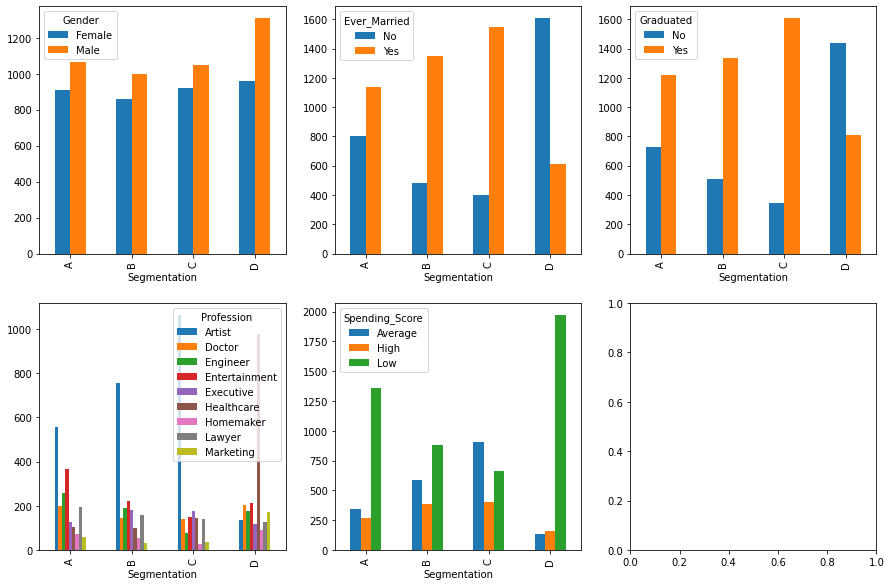

In [59]:
X_cat =X_train.drop(columns = ['Age','Work_Experience','Family_Size']) #dropping numeric cols

figure, axes = plt.subplots(2, 3, figsize=(15, 10))

# function to help display subplots 

classIndex = 0;

for row in range(3):
  for col in range(3):
    if classIndex == 5: 
      break
    ct1 = pd.crosstab(Y_train[:], X_cat[X_cat.columns[classIndex]])
    ct1.plot.bar(ax = axes[row][col])
    classIndex += 1
    

plt.show()


Ever_married- segment A,B,C favour married while D favours unmarried.

Graduate - segment A,B,C favour graduates while D favours non graduates.

Profession: Segments A,B,C favourArtist while D favour healthcare

Spending_Score/ segmentation: segment A and D favour low spenders.

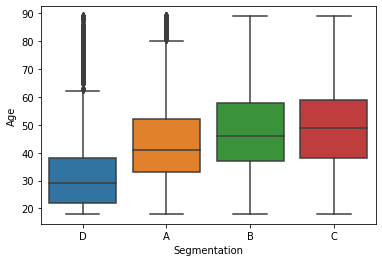

In [60]:
ax = sns.boxplot(x='Segmentation', y='Age', data=df_train)

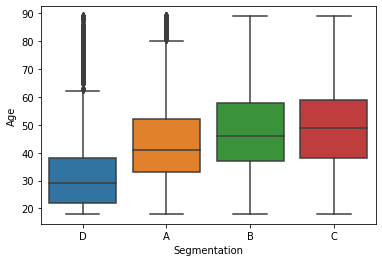

In [61]:
sns.boxplot(x='Segmentation', y='Age', data=df_train)

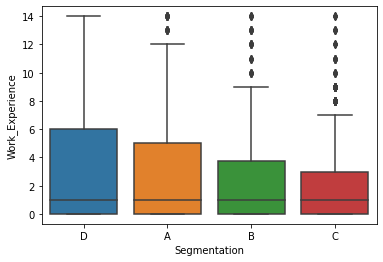

In [62]:
sns.boxplot(x='Segmentation', y='Work_Experience', data=df_train)

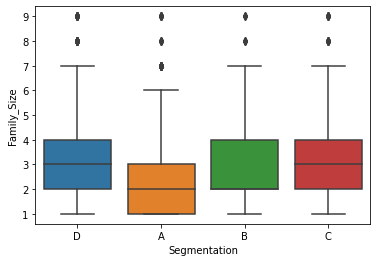

In [63]:
sns.boxplot(x='Segmentation', y='Family_Size', data=df_train)


As correlation doesnt work on categorical data, we need to do some preprocessing on input data to get peason correlation.

In [64]:
# function for prelim processing of Categorical data and numerical data

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler

def prelim_process_cat (column):  
  imputer = SimpleImputer(strategy='most_frequent')
  imputer.fit(column)
  imputed_data = imputer.transform(column)
  
  #  encode categorical values
  encoder = OrdinalEncoder()
  encoder.fit(imputed_data)
  return encoder.transform(imputed_data)

def prelim_process_num (column):  
  imputer = SimpleImputer(strategy='most_frequent')
  imputer.fit(column)
  return imputer.transform(column)

# Categorical Values
cat_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Segmentation'];
# for each categorical col,impute and encode
for col in cat_cols:
  df_train[col] = prelim_process_cat(pd.DataFrame(df_train[col]))

#Impute Numerical values 
num_cols=['Age','Work_Experience','Family_Size']
for col in num_cols:
  df_train[col] = prelim_process_num(pd.DataFrame(df_train[col]))

In [65]:
df_train.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
count,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000
mean,0.547471,0.592836,43.466906,0.625434,2.746901,2.472980,1.359941,2.814824,1.561973
std,0.497772,0.491336,16.711696,0.484041,2.541418,3.265248,0.848418,1.508841,1.139029
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000
50%,1.000000,1.000000,40.000000,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000
75%,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,2.000000,4.000000,3.000000
max,1.000000,1.000000,89.000000,1.000000,8.000000,14.000000,2.000000,9.000000,3.000000


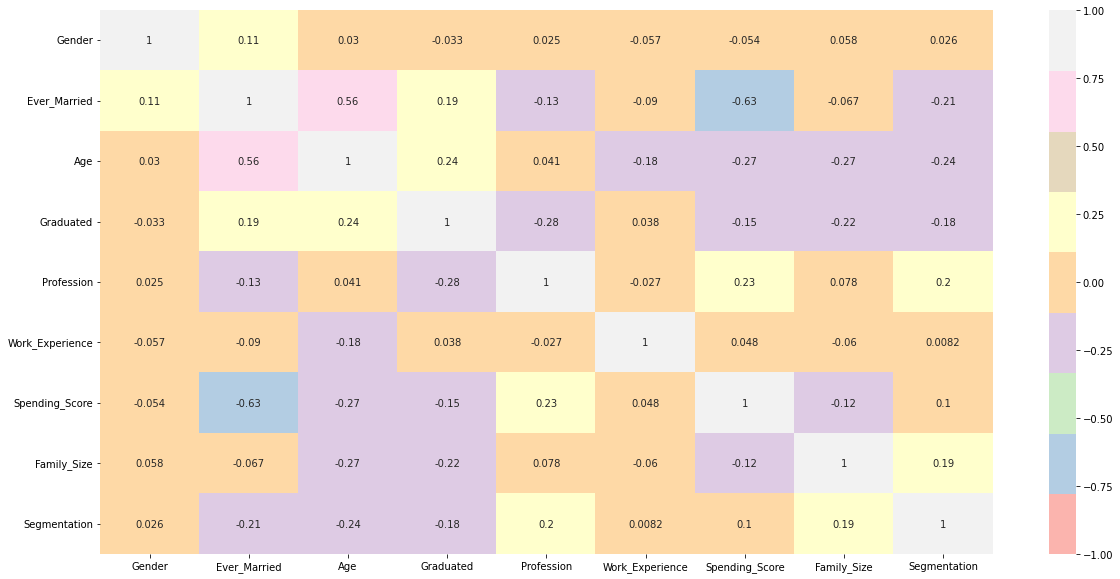

In [66]:
corr_matrix=df_train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,annot=True,cmap='Pastel1', vmin=-1, vmax=+1)

We may deduce from the heatmap that Profession and Family Size are similarly substantially associated to goal, with a positive corelation.
Customer age has a high relationship with target class (segmentation), and the relationship is inverse, meaning that the younger the customer, the more likely they are to be categorized in a specific class.

###Creating Pipelines

In [67]:
# Columntransformer for preprocessing 

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder


#pipeline for the categoric attributes

cat_cols = ["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score"]

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])



# pipeline for the numeric attributes
num_cols = ['Age', 'Family_Size', 'Work_Experience']

num_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])


#applying column transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

In [68]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

num_folds = 10

# A decicion tree with gini
gini_dt_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(criterion='gini'))])

gini_dt_score = cross_val_score(gini_dt_clf, X_train, Y_train, cv=num_folds, scoring="accuracy").mean()


# A decicion tree with entropy
entropy_dt_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(criterion='entropy'))])

entropy_dt_score = cross_val_score(entropy_dt_clf, X_train, Y_train, cv=num_folds, scoring="accuracy").mean()


In [69]:
# An RBF kernel classifier
rbf_svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='rbf'))])

rbf_svc_clf_score = cross_val_score(rbf_svc_clf, X_train, Y_train, cv=num_folds, scoring="accuracy").mean()


# Poly kernel classifier
poly_svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='poly'))])

poly_svc_clf_score = cross_val_score(poly_svc_clf, X_train, Y_train, cv=num_folds, scoring="accuracy").mean()

# linear kernel classifier
linear_svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='linear'))])

linear_svc_clf_score = cross_val_score(linear_svc_clf, X_train, Y_train, cv=num_folds, scoring="accuracy").mean()

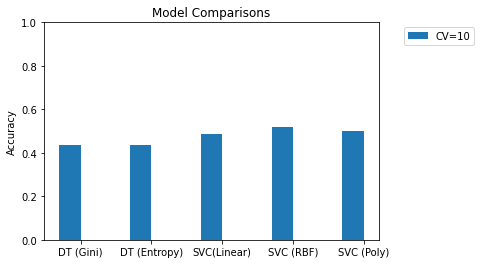

In [70]:
# Summarize the findings for all models

labels = ['DT (Gini)', 'DT (Entropy)', 'SVC(Linear)', 'SVC (RBF)', 'SVC (Poly)']
training_scores = [gini_dt_score, entropy_dt_score, linear_svc_clf_score, rbf_svc_clf_score, poly_svc_clf_score]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='CV=10')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0))

plt.title('Model Comparisons')
plt.show()

|--- Gender <= -0.57
|   |--- Gender <= -1.16
|   |   |--- Spending_Score <= 4.50
|   |   |   |--- truncated branch of depth 14
|   |   |--- Spending_Score >  4.50
|   |   |   |--- truncated branch of depth 14
|   |--- Gender >  -1.16
|   |   |--- Spending_Score <= 4.50
|   |   |   |--- truncated branch of depth 21
|   |   |--- Spending_Score >  4.50
|   |   |   |--- truncated branch of depth 21
|--- Gender >  -0.57
|   |--- Family_Size <= 1.50
|   |   |--- Work_Experience <= 0.50
|   |   |   |--- truncated branch of depth 20
|   |   |--- Work_Experience >  0.50
|   |   |   |--- truncated branch of depth 25
|   |--- Family_Size >  1.50
|   |   |--- Spending_Score <= 1.50
|   |   |   |--- truncated branch of depth 20
|   |   |--- Spending_Score >  1.50
|   |   |   |--- truncated branch of depth 21



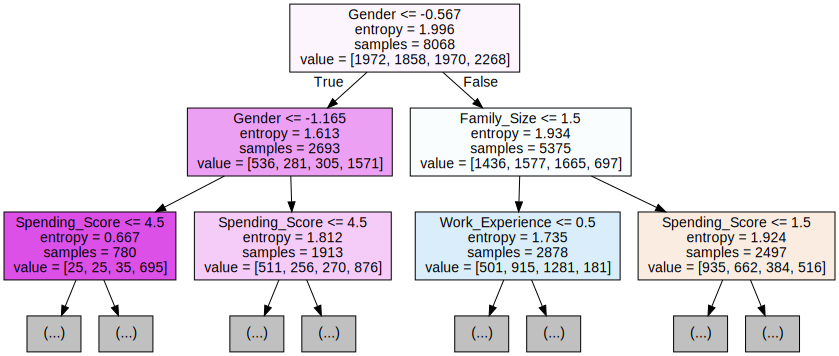

In [71]:
# Convert the decision tree model to text and graph

from sklearn.tree import export_text, export_graphviz
import graphviz


# deep copy of df train data
tree_X = df_train.copy(deep=True)
tree_y = df_train["Segmentation"]

# drop target and non-essential columns
tree_X.drop(['Segmentation'], axis=1, inplace=True)
entropy_dt_clf['classifier'].fit(preprocessor.fit_transform(tree_X), tree_y)


# display the induced decision tree as a series of logical rules
text_representation = export_text(entropy_dt_clf['classifier'],
                                  feature_names=[ "Gender","Ever_Married","Age", "Graduated","Profession" ,"Work_Experience","Spending_Score","Family_Size" ],
                                  max_depth=2)
print(text_representation)


# draw the induced decision tree
dot_data = export_graphviz(entropy_dt_clf['classifier'],
                                  max_depth=2,
                                  feature_names=["Gender","Ever_Married","Age", "Graduated","Profession" ,"Work_Experience","Spending_Score","Family_Size" ],
                                  filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph


Feature: 0, Score: 0.40667
Feature: 1, Score: 0.11392
Feature: 2, Score: 0.17575
Feature: 3, Score: 0.04915
Feature: 4, Score: 0.02454
Feature: 5, Score: 0.04183
Feature: 6, Score: 0.12199
Feature: 7, Score: 0.06616


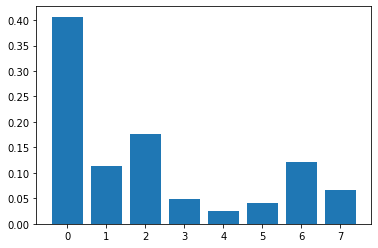

In [72]:
# get feature importances from the model
importance = entropy_dt_clf['classifier'].feature_importances_

# summarize feature importances
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
# plot feature importances
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [73]:
# Use GridSearchCV to find optimum hyperparameter values

# create a dictionary of all values we want to test
param_grid1 = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}      # tree depth 

# use gridsearch to test all values
grid_search1 = GridSearchCV(entropy_dt_clf['classifier'], param_grid1, cv=3)
    
# fit the model 
grid_search1.fit(preprocessor.fit_transform(X_train), Y_train)

print("The best DT model hyperparameters:", grid_search1.best_params_)
print("The best achieved accuracy For DT: " ,(grid_search1.best_score_))


The best DT model hyperparameters: {'criterion': 'gini', 'max_depth': 5}
The best achieved accuracy For DT:  0.5190875857076169


In [74]:
# Use GridSearchCV to find optimum hyperparameter values

# create a dictionary of all values we want to test
param_grid2 = { 'kernel':['rbf','linear', 'poly'],    # kernel
                'decision_function_shape': ['ovo', 'ovr'], # decision function (choose between ovo, one verus one, and ovr, one versus rest)
                 'C' : np.arange(1, 3),
                 'degree': np.arange(1,3)
               } 
   
    
# use gridsearch to test all values
grid_search2 = GridSearchCV(rbf_svc_clf['classifier'], 
                           param_grid2, 
                           cv=3)
    
# fit the model 
grid_search2.fit(preprocessor.fit_transform(X_train), Y_train)

print("The best SVC model hyperparameters:", grid_search2.best_params_)
print("The best achieved accuracy For SVC after hyperparameter optimization  " % (grid_search2.best_score_))

The best SVC model hyperparameters: {'C': 1, 'decision_function_shape': 'ovo', 'degree': 1, 'kernel': 'rbf'}
The best achieved accuracy For SVC after hyperparameter optimization  


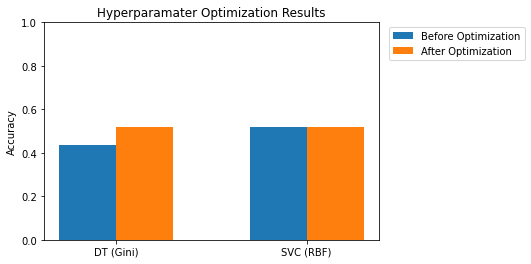

In [75]:
# graph results of grid search for the two models

labels = ['DT (Gini)', 'SVC (RBF)']
before_optimization_scores = [gini_dt_score, rbf_svc_clf_score]
after_optimization_scores = [grid_search1.best_score_, grid_search2.best_score_]

x = np.arange(len(labels))  # the label locations
width = 0.3                # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_optimization_scores, width, label='Before Optimization')
rects2 = ax.bar(x + width/2, after_optimization_scores, width, label='After Optimization')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1.0)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.45, 1.0), loc='upper right')

plt.title('Hyperparamater Optimization Results')
plt.show()

### **Summary**
In this dataset, we performed pipeline imputation and preparing data, pipeline of classification. then we converted decision trees into text and graph. and then we used grid search to optimize a few hyperparameters.